In [1]:
import pandas as pd
import os
import random
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

from transformers import BertModel, BertTokenizer 
import torch

/Users/sachichitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
mammals = pd.read_excel('./data/promptListMammal.xlsx')
reptiles = pd.read_excel('./data/promptListReptile.xlsx')
birds = pd.read_excel('./data/promptListBird.xlsx')
bugs = pd.read_excel('./data/promptListBugs.xlsx')
fish = pd.read_excel('./data/promptListFish.xlsx')
 
#print(fish)

In [3]:
# Picking 15 random prompts from each dataset
# reptiles_15 = reptiles.sample(n=15, random_state=0)
birds_15 = birds.sample(n=15, random_state=0)
list_of_strings = birds_15[0].astype(str).tolist()

# Print the list of strings
print(list_of_strings)
# mam = mammals_15.to_string(index=False)
# mammals_sampled = mammals.sample(n=10, random_state=0)
# mammals_list = mammals_sampled.squeeze().toList()
# fish_15 = fish.sample(n=15, random_state=0)
# bugs_15 = bugs.sample(n=15, random_state=0)
# birds_15 = birds.sample(n=15, random_state=0)
print(birds_15)
type(birds_15)
# type(mammals_list)

['Is a honeybird a bird?', 'Is a asity a bird?', 'Is a chat a bird?', 'Is a satinbird a bird?', 'Is a drongo a bird?', 'Is a harrier-hawk a bird?', 'Is a gnatwren a bird?', 'Is a palmchat a bird?', 'Is a currawong a bird?', 'Is a razorbill a bird?', 'Is a hoopoe a bird?', 'Is a yellowhammer a bird?', 'Is a knot a bird?', 'Is a spinifexbird a bird?', 'Is a brilliant a bird?']
                             0
225     Is a honeybird a bird?
14          Is a asity a bird?
85           Is a chat a bird?
418     Is a satinbird a bird?
132        Is a drongo a bird?
213  Is a harrier-hawk a bird?
186      Is a gnatwren a bird?
340      Is a palmchat a bird?
122     Is a currawong a bird?
394     Is a razorbill a bird?
229        Is a hoopoe a bird?
586  Is a yellowhammer a bird?
261          Is a knot a bird?
469  Is a spinifexbird a bird?
52      Is a brilliant a bird?


pandas.core.frame.DataFrame

In [4]:
# Load pre-trained BertModel and BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') 
model = BertModel.from_pretrained('bert-base-uncased' ) 

In [5]:
# Function to find the animal name between "a" or "an" and "mammal" using vector embeddings
def find_animal_name_embeddings(prompt):
    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors='pt')
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Get the embeddings for the prompt
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state  # Shape: (num_tokens, embedding_size)
#         sentence_embedding = torch.mean(last_hidden_states, dim=1) 
#         embedding_array = sentence_embedding.detach().numpy()
    
    # Define the target words
    target_start_words = ["a", "an"]
    target_end_word = "a"

    # Initialize variables to hold the indices of the target words
    start_index = None
    end_index = None

    # Iterate through the tokens and embeddings to find the indices of the target words
    for i, token in enumerate(tokens):
        
        if token in target_start_words:
            # Check if the next token is a potential animal name
            
            for j in range(i + 1, len(tokens)):
                if tokens[j] == target_end_word:
                    start_index = i + 1
                    end_index = j
                    
                    break
#             if start_index is not None and end_index is not None:
#                 break
#     print(start_index, end_index)
     # If indices are found, calculate average embedding for the animal name
    if start_index is not None and end_index is not None:
        # Extract embeddings for the animal name
        animal_name_state = last_hidden_states[0, start_index:end_index, :]
        # Calculate mean embedding across tokens
        animal_name_embedding = animal_name_state.mean(dim=0)
        # Convert to numpy array
        animal_name_embedding_np = animal_name_embedding.detach().numpy()
        
        # Convert tokens to string
        animal_name_tokens = tokens[start_index:end_index]
        animal_name = tokenizer.convert_tokens_to_string(animal_name_tokens)
        
        return animal_name, animal_name_embedding_np
    
    # Return None if the animal name is not found
    return None, None

# Testing the function
# prompt1 = "is a brown hyena a mammal?"
# animal_name1, embeddings1 = find_animal_name_embeddings(prompt1)
# print(f"Animal name in prompt: '{animal_name1}', Embeddings shape: {embeddings1.shape}")
# print(len(embeddings1))

# prompt2 = "do you know if a platypus is a mammal?"
# animal_name2, embeddings2 = find_animal_name_embeddings(prompt2)
# print(f"Animal name in prompt: '{animal_name2}', Embeddings shape: {embeddings2.shape}")

# prompt3 = "an ostrich is a bird, but is it a mammal?"
# animal_name3, embeddings3 = find_animal_name_embeddings(prompt3)
# print(f"Animal name in prompt: '{animal_name3}', Embeddings shape: {embeddings3.shape}")


Animal name in prompt: 'brown hyena', Embeddings shape: (768,)
768


In [6]:
def getEmbedding(text):
    tokens = tokenizer(text, return_tensors='pt') 
    outputs = model(**tokens) # Transformer layers
    last_hidden_states = outputs.last_hidden_state 
    sentence_embedding = torch.mean(last_hidden_states, dim=1) 
    embedding_array = sentence_embedding.detach().numpy() 
    return embedding_array 

In [7]:
# finds the animal name token vector embeddings within prompt for mammal
vecEmbedsBirds = []
vecName = []
for vecM in list_of_strings:
    animal_name, embeddings = find_animal_name_embeddings(vecM)
    vecEmbedsBirds.append(embeddings)
    vecName.append(animal_name)

vecEmbedsBirds2 = []
for vecM2 in list_of_strings:
    prompt_embedding = getEmbedding(vecM2)
    vecEmbedsBirds2.append(prompt_embedding)
type(vecEmbedsBirds)

# Print the list of vector embeddings of animal names
#print(vecEmbedsBirds)
# print(vecEmbedsBirds2)
# print(len(vecEmbedsBirds2))

15


In [8]:
### Creating Cosine Distance Matrix ###
# print(vecEmbedsBirds2)
vecEmbedsBirds2_reshaped = [np.array(embedding).reshape(-1) for embedding in vecEmbedsBirds2]
cosineMatrix = np.zeros((len(vecEmbedsBirds), len(vecEmbedsBirds2_reshaped)))
# Calculate cosine distances and angles between each pair of embeddings
for i in range(len(vecEmbedsBirds)):
    for j in range(len(vecEmbedsBirds2_reshaped)):
        cosineMatrix[i][j] = 1 - distance.cosine(vecEmbedsBirds[i], vecEmbedsBirds2_reshaped[j])
angleMatrix = np.arccos(cosineMatrix) * 180 / np.pi

In [9]:
angleMatrix

array([[38.05527326, 52.95166244, 52.28727574, 42.27787951, 47.84218761,
        44.66491209, 44.15837678, 50.33755695, 48.01754635, 46.02738   ,
        47.20412611, 47.13475479, 56.56997446, 41.26506935, 53.3288401 ],
       [55.65859701, 38.76513504, 54.92993713, 54.54088907, 51.59163047,
        55.98153972, 55.45455715, 46.9775671 , 51.73964901, 54.52565967,
        55.6830168 , 56.3926258 , 57.15274729, 55.00976238, 58.4036596 ],
       [57.10067142, 57.16641687, 47.56889064, 56.07998947, 57.12788627,
        55.69907499, 58.23868059, 53.40468982, 58.42246606, 57.02025902,
        57.17060715, 58.36300689, 59.8124868 , 57.05686283, 57.44297908],
       [44.80852221, 52.65710032, 52.83003605, 37.96638136, 47.97184985,
        47.71279004, 44.05613056, 49.81951424, 48.04995016, 46.90560154,
        49.17809187, 46.10252731, 53.5987434 , 43.43521967, 54.35462538],
       [50.35071357, 50.73873571, 54.27147821, 49.58453387, 34.9202425 ,
        50.21825667, 46.72431484, 50.42011038, 

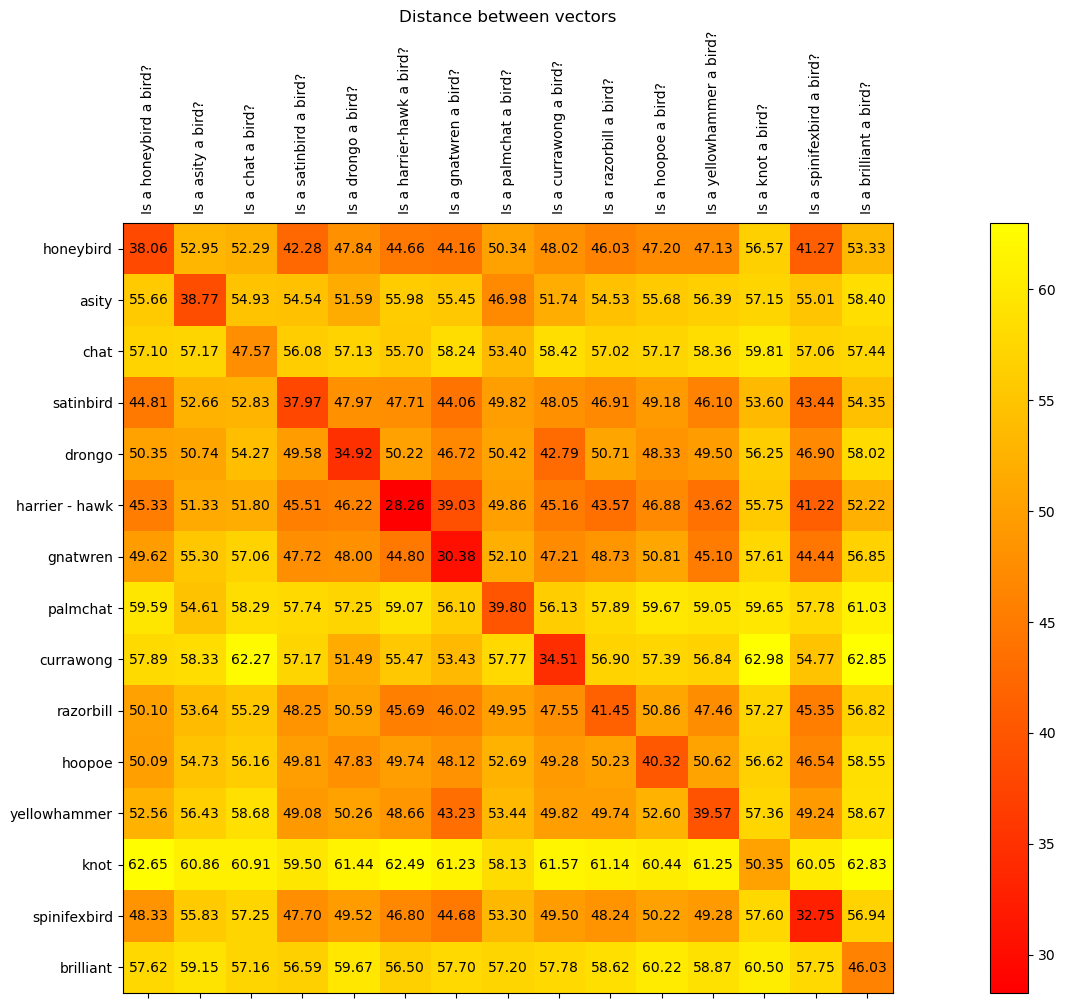

In [10]:
# Plotting Results in Heatmap
plt.figure(figsize=(25, 10)) 
plt.imshow(angleMatrix, cmap='autumn')

# Add cell values as text annotations
for i in range(len(vecEmbedsBirds)):
    for j in range(len(vecEmbedsBirds2_reshaped)):
        plt.annotate(f'{angleMatrix[i][j]:.2f}', xy=(j, i), ha='center', va='center')

plt.title("Distance between vectors") 
plt.xticks(np.arange(len(list_of_strings)), list_of_strings, rotation=90) #prompts
plt.yticks(np.arange(len(vecName)), vecName) # animal words
plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.colorbar()